In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [174]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Exploratory Data Analysis

In [175]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [176]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


#### Lets check the null values without using visualization

In [177]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

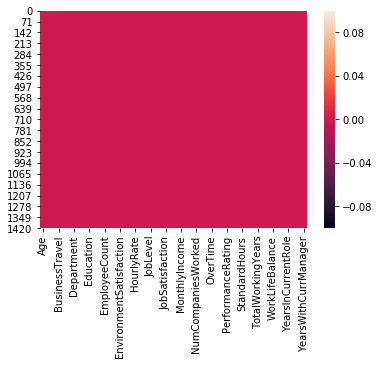

In [178]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [179]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#### Convert the Dataset to Numeric(boolean) Format

In [180]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [181]:
#For all those columns who has 2 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==2):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [182]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [183]:
#For all those columns who has 3 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==3):#Unique values
        le_anima2 = preprocessing.LabelEncoder()
        data[cols] = le_anima2.fit_transform(data[cols])

In [184]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [185]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [186]:
#For all those columns who has 6 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==6):#Unique values
        le_anima3 = preprocessing.LabelEncoder()
        data[cols] = le_anima3.fit_transform(data[cols])

In [187]:
#For all those columns who has 6 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) >6):#Unique values
        le_anima4 = preprocessing.LabelEncoder()
        data[cols] = le_anima4.fit_transform(data[cols])

In [188]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,2,1,1,0,...,1,80,0,8,0,1,6,4,0,5
1,31,0,1,113,1,7,1,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,19,1,2,805,1,1,2,4,1,2,...,2,80,0,7,3,3,0,0,0,0
3,15,0,1,820,1,2,4,1,1,3,...,3,80,0,8,3,3,8,7,3,0
4,9,0,2,312,1,1,1,3,1,4,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,2,3,1,1465,...,3,80,1,17,3,3,5,2,0,3
1466,21,0,2,327,1,5,1,3,1,1466,...,1,80,1,9,5,3,7,7,1,7
1467,9,0,2,39,1,3,3,1,1,1467,...,2,80,1,6,0,3,6,2,0,3
1468,31,0,1,579,2,1,3,3,1,1468,...,4,80,0,17,3,2,9,6,0,8


In [189]:
data = pd.DataFrame(data=data)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,2,1,1,0,...,1,80,0,8,0,1,6,4,0,5
1,31,0,1,113,1,7,1,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,19,1,2,805,1,1,2,4,1,2,...,2,80,0,7,3,3,0,0,0,0
3,15,0,1,820,1,2,4,1,1,3,...,3,80,0,8,3,3,8,7,3,0
4,9,0,2,312,1,1,1,3,1,4,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,2,3,1,1465,...,3,80,1,17,3,3,5,2,0,3
1466,21,0,2,327,1,5,1,3,1,1466,...,1,80,1,9,5,3,7,7,1,7
1467,9,0,2,39,1,3,3,1,1,1467,...,2,80,1,6,0,3,6,2,0,3
1468,31,0,1,579,2,1,3,3,1,1468,...,4,80,0,17,3,2,9,6,0,8


In [190]:
data.shape

(1470, 35)

In [191]:
data.dtypes

Age                          int64
Attrition                    int32
BusinessTravel               int32
DailyRate                    int64
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int32
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                      int32
JobSatisfaction              int64
MaritalStatus                int32
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                     int32
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [192]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,18.923810,0.161224,1.607483,443.074830,1.260544,8.192517,2.912925,2.247619,1.0,734.500000,...,2.712245,80.0,0.793878,11.278231,2.799320,2.761224,6.991156,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,253.513199,0.527792,8.106864,1.024165,1.331369,0.0,424.496761,...,1.081209,0.0,0.852077,7.775842,1.289271,0.706476,6.053027,3.623137,3.222430,3.568136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,1.000000,225.000000,1.000000,1.000000,2.000000,1.000000,1.0,367.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,18.000000,0.000000,2.000000,447.000000,1.000000,6.000000,3.000000,2.000000,1.0,734.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,25.000000,0.000000,2.000000,660.000000,2.000000,13.000000,4.000000,3.000000,1.0,1101.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,42.000000,1.000000,2.000000,885.000000,2.000000,28.000000,5.000000,5.000000,1.0,1469.000000,...,4.000000,80.0,3.000000,39.000000,6.000000,4.000000,36.000000,18.000000,15.000000,17.000000


In [193]:
dfcor = data.corr()
dfcor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010557,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010349,...,0.053535,NaN,0.037510,0.680409,-0.019621,-0.021490,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010369,...,-0.045872,NaN,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015810,...,-0.035986,NaN,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636
DailyRate,0.010557,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,NaN,-0.051861,...,0.008530,NaN,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849
Department,-0.031882,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,NaN,-0.010365,...,-0.022414,NaN,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,NaN,0.032928,...,0.006557,NaN,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,NaN,0.041901,...,-0.009118,NaN,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002457,...,-0.004378,NaN,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010349,-0.010369,-0.015810,-0.051861,-0.010365,0.032928,0.041901,-0.002457,NaN,1.000000,...,-0.069654,NaN,0.062452,-0.013950,0.023907,0.010740,-0.010528,-0.008853,-0.009151,-0.009432


In [194]:
data['EmployeeCount'].unique()

array([1], dtype=int64)

#### Since Employee Count has only one unique value and there is no correlation of Employee Count with any other variables we are dropping Employee Count Column

In [195]:
data.drop("EmployeeCount", axis=1,inplace=True)

In [196]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,2,1,0,2,...,1,80,0,8,0,1,6,4,0,5
1,31,0,1,113,1,7,1,1,1,3,...,4,80,1,10,3,3,10,7,1,7
2,19,1,2,805,1,1,2,4,2,4,...,2,80,0,7,3,3,0,0,0,0
3,15,0,1,820,1,2,4,1,3,4,...,3,80,0,8,3,3,8,7,3,0
4,9,0,2,312,1,1,1,3,4,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,2,3,1465,3,...,3,80,1,17,3,3,5,2,0,3
1466,21,0,2,327,1,5,1,3,1466,4,...,1,80,1,9,5,3,7,7,1,7
1467,9,0,2,39,1,3,3,1,1467,2,...,2,80,1,6,0,3,6,2,0,3
1468,31,0,1,579,2,1,3,3,1468,4,...,4,80,0,17,3,2,9,6,0,8


In [197]:
data['StandardHours'].unique()

array([80], dtype=int64)

#### Since StandardHours has only one unique value and there is no correlation of StandardHours with any other variables we are dropping StandardHours Column

In [198]:
data.drop("StandardHours", axis=1,inplace=True)

In [199]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,2,1,0,2,...,0,1,0,8,0,1,6,4,0,5
1,31,0,1,113,1,7,1,1,1,3,...,1,4,1,10,3,3,10,7,1,7
2,19,1,2,805,1,1,2,4,2,4,...,0,2,0,7,3,3,0,0,0,0
3,15,0,1,820,1,2,4,1,3,4,...,0,3,0,8,3,3,8,7,3,0
4,9,0,2,312,1,1,1,3,4,1,...,0,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,2,3,1465,3,...,0,3,1,17,3,3,5,2,0,3
1466,21,0,2,327,1,5,1,3,1466,4,...,0,1,1,9,5,3,7,7,1,7
1467,9,0,2,39,1,3,3,1,1467,2,...,1,2,1,6,0,3,6,2,0,3
1468,31,0,1,579,2,1,3,3,1468,4,...,0,4,0,17,3,2,9,6,0,8


In [200]:
dfcorr = data.corr()
dfcorr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010557,-0.031882,-0.001686,0.208034,-0.040873,-0.010349,0.010146,...,0.001904,0.053535,0.037510,0.680409,-0.019621,-0.021490,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,-0.010369,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,-0.015810,0.004174,...,-0.026341,-0.035986,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636
DailyRate,0.010557,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,-0.051861,0.018462,...,0.000633,0.008530,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849
Department,-0.031882,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,-0.010365,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,0.032928,-0.016075,...,0.027110,0.006557,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,0.041901,-0.027128,...,-0.024539,-0.009118,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,-0.002457,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010349,-0.010369,-0.015810,-0.051861,-0.010365,0.032928,0.041901,-0.002457,1.000000,0.017424,...,-0.020675,-0.069654,0.062452,-0.013950,0.023907,0.010740,-0.010528,-0.008853,-0.009151,-0.009432
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018462,-0.019395,-0.016075,-0.027128,0.043163,0.017424,1.000000,...,-0.029548,0.007665,0.003432,-0.002900,-0.019359,0.027627,0.000657,0.018007,0.016194,-0.004999


In [201]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,2,1,0,2,...,0,1,0,8,0,1,6,4,0,5
1,31,0,1,113,1,7,1,1,1,3,...,1,4,1,10,3,3,10,7,1,7
2,19,1,2,805,1,1,2,4,2,4,...,0,2,0,7,3,3,0,0,0,0
3,15,0,1,820,1,2,4,1,3,4,...,0,3,0,8,3,3,8,7,3,0
4,9,0,2,312,1,1,1,3,4,1,...,0,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,2,3,1465,3,...,0,3,1,17,3,3,5,2,0,3
1466,21,0,2,327,1,5,1,3,1466,4,...,0,1,1,9,5,3,7,7,1,7
1467,9,0,2,39,1,3,3,1,1467,2,...,1,2,1,6,0,3,6,2,0,3
1468,31,0,1,579,2,1,3,3,1468,4,...,0,4,0,17,3,2,9,6,0,8


#### Since Employee Number has all the value unique and there is no such relation between other columns so we are deleting this column

In [202]:
data.drop("EmployeeNumber", axis=1,inplace=True)

In [203]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,2,1,2,0,...,0,1,0,8,0,1,6,4,0,5
1,31,0,1,113,1,7,1,1,3,1,...,1,4,1,10,3,3,10,7,1,7
2,19,1,2,805,1,1,2,4,4,1,...,0,2,0,7,3,3,0,0,0,0
3,15,0,1,820,1,2,4,1,4,0,...,0,3,0,8,3,3,8,7,3,0
4,9,0,2,312,1,1,1,3,1,1,...,0,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,2,3,3,1,...,0,3,1,17,3,3,5,2,0,3
1466,21,0,2,327,1,5,1,3,4,1,...,0,1,1,9,5,3,7,7,1,7
1467,9,0,2,39,1,3,3,1,2,1,...,1,2,1,6,0,3,6,2,0,3
1468,31,0,1,579,2,1,3,3,4,1,...,0,4,0,17,3,2,9,6,0,8


In [204]:
dfcorr = data.corr()
dfcorr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010557,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680409,-0.019621,-0.021490,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636
DailyRate,0.010557,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,0.018462,-0.011194,...,0.000633,0.008530,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849
Department,-0.031882,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018462,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002900,-0.019359,0.027627,0.000657,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011194,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046875,-0.038787,-0.002753,-0.030797,-0.041483,-0.026985,-0.030599


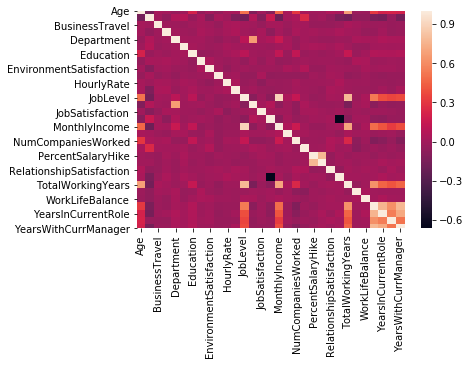

In [205]:
sns.heatmap(dfcorr)

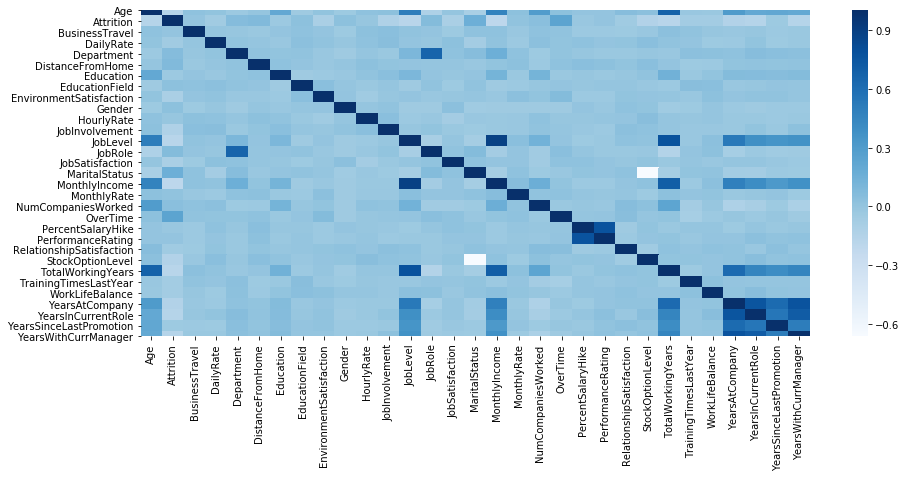

In [206]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcorr,cmap='Blues',annot=False)

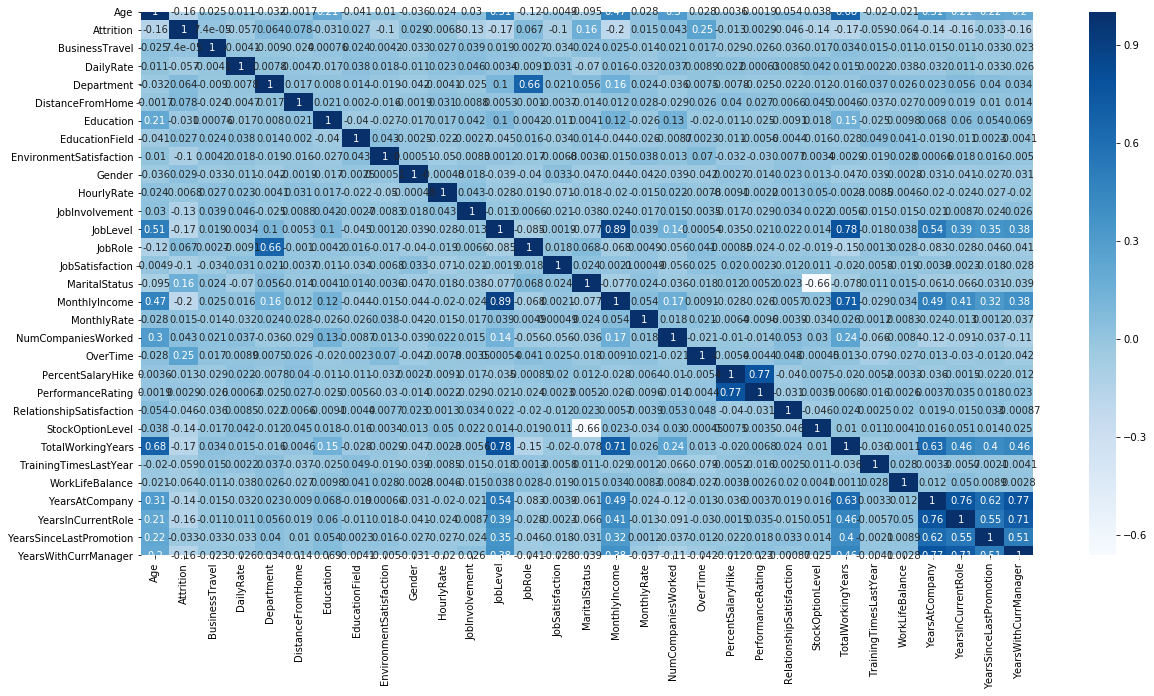

In [207]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcorr,cmap='Blues',annot=True)

In [210]:
#Converting All Comuns into number
data = pd.get_dummies(data)

In [211]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(1470, 32)
(0, 32)


#### Checking Skewness and Removing it

In [212]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.112899
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [213]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [214]:
#Lets Again Check the Skewness
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome           -0.246004
Education                  -0.289681
EducationField             -0.054786
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike          -0.281716
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622798
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -0.552480
Y

In [215]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Over18_Y
0,23,0.693147,2,624,2,0.000000,2,0.693147,2,0,...,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759,1
1,31,0.000000,1,113,1,2.079442,1,0.693147,3,1,...,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442,1
2,19,0.693147,2,805,1,0.693147,2,1.609438,4,1,...,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000,1
3,15,0.000000,1,820,1,1.098612,4,0.693147,4,0,...,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000,1
4,9,0.000000,2,312,1,0.693147,1,1.386294,1,1,...,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0.000000,1,494,1,3.135494,2,1.386294,3,1,...,3,0.693147,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294,1
1466,21,0.000000,2,327,1,1.791759,1,1.386294,4,1,...,1,0.693147,2.302585,1.791759,3,2.079442,2.079442,0.693147,2.079442,1
1467,9,0.000000,2,39,1,1.386294,3,0.693147,2,1,...,2,0.693147,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294,1
1468,31,0.000000,1,579,2,0.693147,3,1.386294,4,1,...,4,0.000000,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225,1


In [216]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Over18_Y                    0
dtype: int64

#### Separating X and Y Variable

In [217]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Over18_Y
0,23,0.693147,2,624,2,0.000000,2,0.693147,2,0,...,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759,1
1,31,0.000000,1,113,1,2.079442,1,0.693147,3,1,...,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442,1
2,19,0.693147,2,805,1,0.693147,2,1.609438,4,1,...,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000,1
3,15,0.000000,1,820,1,1.098612,4,0.693147,4,0,...,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000,1
4,9,0.000000,2,312,1,0.693147,1,1.386294,1,1,...,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0.000000,1,494,1,3.135494,2,1.386294,3,1,...,3,0.693147,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294,1
1466,21,0.000000,2,327,1,1.791759,1,1.386294,4,1,...,1,0.693147,2.302585,1.791759,3,2.079442,2.079442,0.693147,2.079442,1
1467,9,0.000000,2,39,1,1.386294,3,0.693147,2,1,...,2,0.693147,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294,1
1468,31,0.000000,1,579,2,0.693147,3,1.386294,4,1,...,4,0.000000,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225,1


In [218]:
X = data.drop("Attrition", axis=1)

In [219]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Over18_Y
0,23,2,624,2,0.000000,2,0.693147,2,0,64,...,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759,1
1,31,1,113,1,2.079442,1,0.693147,3,1,31,...,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442,1
2,19,2,805,1,0.693147,2,1.609438,4,1,62,...,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000,1
3,15,1,820,1,1.098612,4,0.693147,4,0,26,...,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000,1
4,9,2,312,1,0.693147,1,1.386294,1,1,10,...,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,1,494,1,3.135494,2,1.386294,3,1,11,...,3,0.693147,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294,1
1466,21,2,327,1,1.791759,1,1.386294,4,1,12,...,1,0.693147,2.302585,1.791759,3,2.079442,2.079442,0.693147,2.079442,1
1467,9,2,39,1,1.386294,3,0.693147,2,1,57,...,2,0.693147,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294,1
1468,31,1,579,2,0.693147,3,1.386294,4,1,33,...,4,0.000000,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225,1


#### Converting the Output Variable into 0 and 1 form

In [221]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [222]:
array = data['Attrition']

array.shape

(1470,)

In [223]:
le=LabelEncoder()
data1=le.fit_transform(data['Attrition'])
data1

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [224]:
data['Attrition'] = data1
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Over18_Y
0,23,1,2,624,2,0.000000,2,0.693147,2,0,...,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759,1
1,31,0,1,113,1,2.079442,1,0.693147,3,1,...,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442,1
2,19,1,2,805,1,0.693147,2,1.609438,4,1,...,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000,1
3,15,0,1,820,1,1.098612,4,0.693147,4,0,...,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000,1
4,9,0,2,312,1,0.693147,1,1.386294,1,1,...,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,3.135494,2,1.386294,3,1,...,3,0.693147,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294,1
1466,21,0,2,327,1,1.791759,1,1.386294,4,1,...,1,0.693147,2.302585,1.791759,3,2.079442,2.079442,0.693147,2.079442,1
1467,9,0,2,39,1,1.386294,3,0.693147,2,1,...,2,0.693147,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294,1
1468,31,0,1,579,2,0.693147,3,1.386294,4,1,...,4,0.000000,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225,1


In [225]:
Y = data["Attrition"]
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [226]:
Y.shape

(1470,)

In [227]:
Y = Y.values.reshape(-1,1)

In [228]:
Y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [229]:
Y.shape

(1470, 1)

In [230]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [231]:
train_X.shape

(1146, 31)

In [232]:
test_X.shape

(324, 31)

In [233]:
train_Y.shape

(1146, 1)

In [234]:
test_Y.shape

(324, 1)

#### Applying Logistic Regression

In [235]:
lg=LogisticRegression()

In [236]:
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [237]:
pred=lg.predict(test_X)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [238]:
print("accuracy score:",accuracy_score(pred,test_Y))

accuracy score: 0.8858024691358025


In [239]:
print(confusion_matrix(test_Y,pred))

[[269   4]
 [ 33  18]]


In [240]:
print(classification_report(test_Y,pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       273
           1       0.82      0.35      0.49        51

    accuracy                           0.89       324
   macro avg       0.85      0.67      0.71       324
weighted avg       0.88      0.89      0.87       324



### Using Cross Validation to Check Overfitting,Underfitting and Predict the Result

In [241]:
from sklearn.model_selection import cross_val_score
accuracycvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print(accuracycvlg1)

0.8755207821744024


In [242]:
from sklearn.model_selection import cross_val_score
accuracycvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print(accuracycvlg2)

0.8727772854429703


### Grid Search Cross Validation for Logistic Regression

In [243]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.8734729493891797


In [244]:
lg2=LogisticRegression(C=1,penalty="l1")
lg2.fit(train_X,train_Y)
print("score",lg2.score(test_X,test_Y))

score 0.8888888888888888


### Boost the Dataset by AdaBoost and GradiantBoost

In [245]:
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

0.8917975567190227
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


0.8888888888888888

In [246]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

0.956369982547993
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


0.8703703703703703

### Boosting though GradientBoost Regressor By using Parameters

In [247]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [248]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.6665017719140509
R2 sq:  0.6665017719140509
Mean squared error: 0.09
Test Variance score: 0.28


### Lets Visualize the Goodness of the Prediction

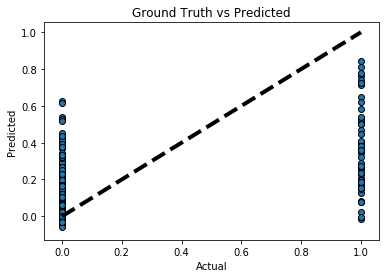

In [249]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Prediction Using Naive Bayes Algo

In [250]:
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.5895061728395061
[[160 113]
 [ 20  31]]
              precision    recall  f1-score   support

           0       0.89      0.59      0.71       273
           1       0.22      0.61      0.32        51

    accuracy                           0.59       324
   macro avg       0.55      0.60      0.51       324
weighted avg       0.78      0.59      0.65       324



### Multinomial NB by using Crossval Score

In [251]:
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.53535354 0.53535354 0.61616162 0.66326531 0.62244898 0.56122449
 0.52040816 0.67346939 0.60204082 0.67346939 0.59183673 0.51020408
 0.60824742 0.55670103 0.64948454]
Mean Scores 0.5946446015665455
Standard deviation 0.05407114647693614
Y Prediction values
[1 1 1 ... 0 0 0]


array([[737, 496],
       [ 98, 139]], dtype=int64)

### Pediction using Support Vector Machine

In [252]:
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.8425925925925926
[[273   0]
 [ 51   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       273
           1       0.00      0.00      0.00        51

    accuracy                           0.84       324
   macro avg       0.42      0.50      0.46       324
weighted avg       0.71      0.84      0.77       324



### Support Vector Machine by using Crossval Score

In [253]:
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.83728814 0.83728814 0.84013605 0.83959044 0.83959044]
Mean Scores 0.8387786425960446
Standard Deviation 0.0012331935075144994
Y Prediction values
[0 0 0 ... 0 0 0]


0.8387755102040816

### Use GridSearchCV for Support Vector Machine

In [254]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.838, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.838, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.838, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.838, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    8.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [255]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [256]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       273
           1       0.00      0.00      0.00        51

    accuracy                           0.84       324
   macro avg       0.42      0.50      0.46       324
weighted avg       0.71      0.84      0.77       324



#### Boosting through Support Vector Classifier

In [257]:
#from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME.R')

#abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME')

# Train Adaboost Classifer
modelsvboost = abc.fit(train_X,train_Y)

#Predict the response for test dataset
y_pred = modelsvboost.predict(test_X)


print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))

Accuracy: 0.8425925925925926


### Prediction Using DecisionTreeClassifier

In [258]:
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.7716049382716049
[[233  40]
 [ 34  17]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       273
           1       0.30      0.33      0.31        51

    accuracy                           0.77       324
   macro avg       0.59      0.59      0.59       324
weighted avg       0.78      0.77      0.78       324



### DecisionTreeClassifier by using Crossval Score

In [259]:
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.62370163 0.60478469 0.64219067 0.5886177  0.65127895]
Mean Scores 0.6221147280789474
Standard Deviation 0.02314517117862136
Y Prediction values
[0 0 1 ... 1 0 0]


array([[1059,  174],
       [ 146,   91]], dtype=int64)

### Using GridSearchCV for DecisionTreeClassifier

In [260]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    9.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [261]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 6, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [262]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.75      0.06      0.11        51

    accuracy                           0.85       324
   macro avg       0.80      0.53      0.51       324
weighted avg       0.83      0.85      0.79       324



### Boost Decision Tree Classifier

In [263]:
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [264]:
predictions = dtbclassifier.predict(test_X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [265]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.8734567901234568


In [266]:
confusion_matrix(test_Y, predictions)

array([[260,  13],
       [ 28,  23]], dtype=int64)

### Prediction Using KNN Nearest Neighbor

In [267]:
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.8302469135802469
[[264   9]
 [ 46   5]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       273
           1       0.36      0.10      0.15        51

    accuracy                           0.83       324
   macro avg       0.60      0.53      0.53       324
weighted avg       0.77      0.83      0.79       324



### KNN Nearest Neighbor by using Crossval Score 

In [268]:
# k=10

kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.83108108 0.7972973  0.7972973  0.80272109 0.85034014 0.80272109
 0.84353741 0.82876712 0.82876712 0.85616438]
Mean Scores 0.823869403370382
Standard Deviation 0.021300553566016105
Y Prediction values
[0 0 0 ... 0 0 0]
y_pred.shape (1470,)


array([[1189,   44],
       [ 216,   21]], dtype=int64)

### Use GridSearchCV for KNN Nearest Neighbor

In [269]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [270]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn1 = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7643630816170862, 0.8298398169336384, 0.805400457665904, 0.8315789473684211, 0.8219755911517925, 0.8376811594202899, 0.8306788710907703, 0.8359420289855072, 0.8368115942028986, 0.8368192219679635, 0.8368039664378337, 0.8376887871853546, 0.8368192219679633, 0.8376964149504195, 0.8376964149504195, 0.836826849733028, 0.8350800915331806, 0.8377040427154844, 0.8368192219679633, 0.8368344774980929, 0.8377040427154844, 0.8377116704805492, 0.8377116704805492, 0.8385812356979404, 0.8385812356979404, 0.8377116704805492, 0.8377116704805492, 0.8377116704805492, 0.8377116704805492, 0.8377116704805492]


In [271]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [272]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [273]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')

In [274]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [275]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 24}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')


In [276]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       273
           1       0.00      0.00      0.00        51

    accuracy                           0.84       324
   macro avg       0.42      0.50      0.46       324
weighted avg       0.71      0.84      0.77       324



#### Bagging of KNN Nearest Neighbor 

In [277]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [278]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [279]:
predictions = baggingknn.predict(test_X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [280]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.8425925925925926


In [281]:
confusion_matrix(test_Y, predictions)

array([[273,   0],
       [ 51,   0]], dtype=int64)

### Prediction Using RandomForest Classification

In [282]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.8641975308641975
[[270   3]
 [ 41  10]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       273
           1       0.77      0.20      0.31        51

    accuracy                           0.86       324
   macro avg       0.82      0.59      0.62       324
weighted avg       0.85      0.86      0.83       324



### RandomForestClassifier Using Cross_Val_Score

In [283]:
# k=10

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.84459459 0.85135135 0.86486486 0.82993197 0.86394558 0.84353741
 0.82993197 0.86986301 0.83561644 0.85616438]
Mean Scores 0.8489801585202759
Standard Deviation 0.013866251736984359
Y Prediction values
[0 0 0 ... 0 0 0]
y_pred.shape (1470,)


array([[1211,   22],
       [ 202,   35]], dtype=int64)

### Using GridSearchCV for Random Forest Classifier

In [284]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [285]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [286]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       273
           1       0.91      0.20      0.32        51

    accuracy                           0.87       324
   macro avg       0.89      0.60      0.63       324
weighted avg       0.88      0.87      0.83       324



#### Bagging of Random Forest Classifier 

In [287]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [289]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [290]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [291]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

0.8425925925925926


In [292]:
confusion_matrix(test_Y, predictionsrf)

array([[273,   0],
       [ 51,   0]], dtype=int64)

#### NOTE::Among all models lg gives the Highest accuracy(89%) so we are going to save this model

In [294]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(lg,'HR Analytics.pkl')

['HR Analytics.pkl']